In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

In [29]:
df = pd.read_csv('doc.csv')
df.head()

,ID_Cliente,Idade,Genero,Tempo_no_Site_Minutos,Sessoes_por_Mes,Plataforma_Acesso,Assinante_Premium,Valor_Gasto_Anual
0,1,34.0,Feminino,12.5,15,Mobile App,Nao,550.75
1,2,45.0,Masculino,11.8,25,Desktop,Sim,850.20
2,3,NaN,Feminino,13.1,18,Mobile App,Nao,620.50
3,4,52.0,Masculino,10.2,30,Desktop,Sim,950.00
4,5,31.0,Nao-binario,NaN,22,Mobile App,Sim,890.80


Valores nulos por coluna:
ID_Cliente               0
Idade                    1
Genero                   1
Tempo_no_Site_Minutos    1
Sessoes_por_Mes          0
Plataforma_Acesso        0
Assinante_Premium        0
Valor_Gasto_Anual        0
dtype: int64


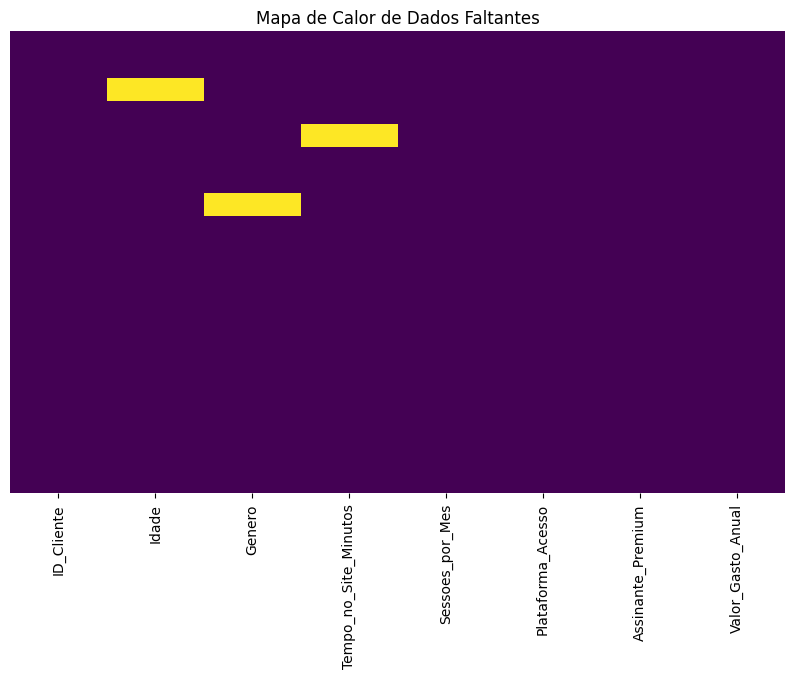

In [30]:
print("Valores nulos por coluna:")
print(df.isnull().sum())

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Mapa de Calor de Dados Faltantes')
plt.show()

In [31]:

idade_mediana = df[df['Idade'] > 0]['Idade'].median()
print(f"A idade mediana (desconsiderando erros) é: {idade_mediana}")

df.loc[df['Idade'] <= 0, 'Idade'] = idade_mediana
print("\nIdade negativa corrigida com sucesso!")

print("Contagem de idades menores ou iguais a zero após correção:")
print(df[df['Idade'] <= 0]['Idade'].count())

A idade mediana (desconsiderando erros) é: 36.5

Idade negativa corrigida com sucesso!
Contagem de idades menores ou iguais a zero após correção:
0


In [32]:

df['Idade'].fillna(df['Idade'].median(), inplace=True)
df['Tempo_no_Site_Minutos'].fillna(df['Tempo_no_Site_Minutos'].median(), inplace=True)
print("Valores numéricos faltantes preenchidos com a mediana.")

moda_genero = df['Genero'].mode()[0]
df['Genero'].fillna(moda_genero, inplace=True)
print(f"Valores categóricos ('Genero') faltantes preenchidos com a moda: '{moda_genero}'")

print("\nVerificação final de valores nulos:")
print(df.isnull().sum())

Valores numéricos faltantes preenchidos com a mediana.
Valores categóricos ('Genero') faltantes preenchidos com a moda: 'Feminino'

Verificação final de valores nulos:
ID_Cliente               0
Idade                    0
Genero                   0
Tempo_no_Site_Minutos    0
Sessoes_por_Mes          0
Plataforma_Acesso        0
Assinante_Premium        0
Valor_Gasto_Anual        0
dtype: int64


C:\Users\Usuário\AppData\Local\Temp\ipykernel_15084\3808458601.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Idade'].fillna(df['Idade'].median(), inplace=True)
C:\Users\Usuário\AppData\Local\Temp\ipykernel_15084\3808458601.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

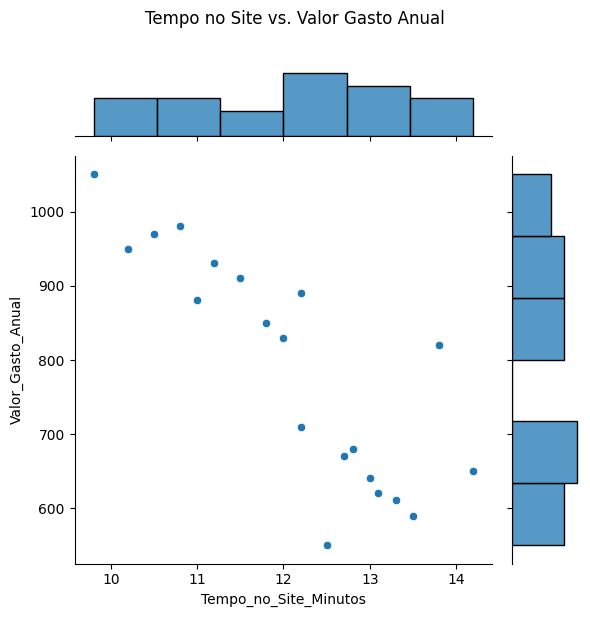

In [33]:
sns.jointplot(x='Tempo_no_Site_Minutos', y='Valor_Gasto_Anual', data=df, kind='scatter')
plt.suptitle('Tempo no Site vs. Valor Gasto Anual', y=1.02)
plt.tight_layout()
plt.show()